In [199]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
class Figure:
    
    
    def __init__(self, sheet_path=r'C:\Users\HassanEldeeb\Documents\GitHub\AutoMLBenchmarking\Complete_Sheet.xlsx'):
        self.sheet = pd.read_excel(sheet_path,
                              null_values=['', 'NA', 'NAN', 'NaN', 'Nan', 'NA\n','0', '0.0'],
                              sheet_name=['10 Min', '30 Min', '60 Min', '4 Hours'])
    def get_sheet(self):
        return self.sheet
    
    def check(self):
        return pd.DataFrame({ 'diff': self.diff, 'va11': self.var1, 'var2': self.var2 })
        
    def comare_acc_scatter(self, var1, var2, x_label, y_label, title,
                           legend_missing='Failed Run', legend_negative='Negative Difference',
                           legend_zero='Zero Difference', legend_positive='Positive Difference',
                           fig_size = (8, 8), legend_ncols=4, legend_x_shift=0, y_limit=None,
                           x_axis_grid=False):
        self.var1, self.var2 = var1.fillna(0), var2.fillna(0)
        argsort = (self.var1 - self.var2).argsort()
        self.var1 = self.var1[argsort].reset_index(drop=True)
        self.var2 = self.var2[argsort].reset_index(drop=True)

        self.diff = (self.var1 - self.var2).reset_index(drop=True)
        
        fig, ax = plt.subplots(figsize=fig_size)


        yy = self.diff[(self.diff < -0.01) & (self.var1 != 0.0) & (self.var2 != 0)]
        ax.scatter(x=yy.index, 
               y=yy,
               color= 'red',
               marker ='v',
               label = 'Negative Difference')

        yy = self.diff[(self.diff > -0.01) & (self.diff < 0.01) & (self.var1 != 0.0) & (self.var2 != 0)]
        ax.scatter(x=yy.index, 
               y=yy,
               color= 'blue',
               marker ='.',
               label = 'Zero Difference')

        yy = self.diff[(self.diff > 0.01)  & (self.var1 != 0.0) & (self.var2 != 0)]
        ax.scatter(x=yy.index, 
               y=yy,
               color= 'green',
               marker ='^',
               label = 'Positive Difference')

        yy = self.diff[(self.var1 == 0.0) | (self.var2 == 0)]
        ax.scatter(x=yy.index, 
               y=yy,
               color= 'darkorange',
               marker ='x',
               label = 'Failed Run')

        l = ax.legend( ncol=legend_ncols, bbox_to_anchor=(legend_x_shift, 1), loc='lower left')
        ax.set(xlabel=x_label, ylabel=y_label)
        ax.yaxis.grid() # horizontal lines
        if x_axis_grid:
            ax.xaxis.grid()
        plt.ylim(y_limit)
        plt.xticks(np.arange(0, 101, 10))
        plt.title(label = title, pad = 25)
        plt.show()

# How often each tool succeeded to deliver a pipeline within the given time budget?

In [8]:
result = pd.read_excel(r'C:\Users\HassanEldeeb\Documents\GitHub\AutoMLBenchmarking\Complete_Sheet.xlsx', null_values=['', 'NA', 'NAN', 'NaN', 'Nan', 'NA\n','0', '0.0'], sheet_name=['10 Min', '30 Min', '60 Min', '4 Hours'])

In [5]:
result['30 Min'].smartml_valid_acc.dtype

dtype('float64')

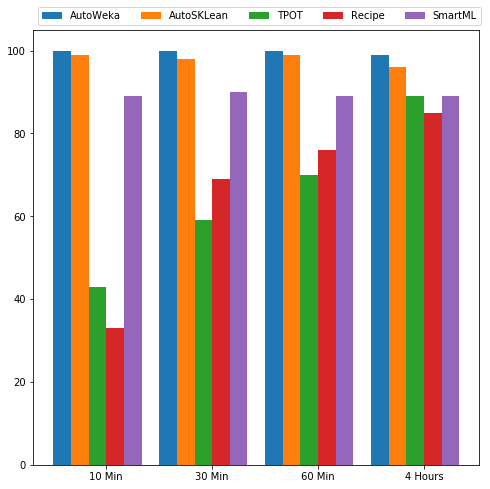

In [407]:
experiment_time = ['10 Min', '30 Min', '60 Min', '4 Hours']
frameworks = ['AutoWeka', 'AutoSKLean', 'TPOT', 'Recipe', 'SmartML']
#colors        = ['seagreen', 'red', 'orchid', 'orange']
autoweka = [np.count_nonzero(~np.isnan(result['10 Min'].autoweka_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['30 Min'].autoweka_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['60 Min'].autoweka_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['4 Hours'].autoweka_accuracy_mean))]
autoSKLearn = [np.count_nonzero(~np.isnan(result['10 Min'].sklearn_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['30 Min'].sklearn_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['60 Min'].sklearn_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['4 Hours'].sklearn_accuracy_mean))]
TPOT = [np.count_nonzero(~np.isnan(result['10 Min'].tpot_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['30 Min'].tpot_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['60 Min'].tpot_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['4 Hours'].tpot_accuracy_mean))]
Recipe = [np.count_nonzero(~np.isnan(result['10 Min'].recipe_test_acc)),
            np.count_nonzero(~np.isnan(result['30 Min'].recipe_test_acc)),
            np.count_nonzero(~np.isnan(result['60 Min'].recipe_test_acc)),
            np.count_nonzero(~np.isnan(result['4 Hours'].recipe_test_acc))]
SmartML = [np.count_nonzero(~np.isnan(result['10 Min'].smartml_valid_acc)),
            np.count_nonzero(~np.isnan(result['30 Min'].smartml_valid_acc)),
            np.count_nonzero(~np.isnan(result['60 Min'].smartml_valid_acc)),
            np.count_nonzero(~np.isnan(result['4 Hours'].smartml_valid_acc))]
numerical = [autoweka,
             autoSKLearn,
             TPOT,
             Recipe,
             SmartML]
number_groups = len(frameworks) 
bin_width = 1.0/(len(frameworks)+1)
fig, ax = plt.subplots(figsize=(8,8))
for i in range(number_groups):
    ax.bar(x=np.arange(len(experiment_time)) + i*bin_width, 
           height=numerical[i],
           width=bin_width,
          # color=colors[i],
           align='center')
ax.set_xticks(np.arange(len(experiment_time)) + number_groups/(2*(number_groups+1)))
# number_groups/(2*(number_groups+1)): offset of xticklabel
ax.set_xticklabels(experiment_time)
ax.legend(frameworks, ncol=len(frameworks), bbox_to_anchor=(0, 1), loc='lower left')

plt.show()

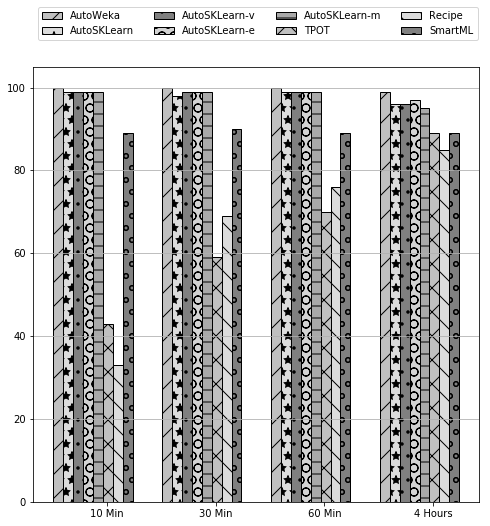

In [408]:
experiment_time = ['10 Min', '30 Min', '60 Min', '4 Hours']
frameworks = ['AutoWeka', 'AutoSKLearn', 'AutoSKLearn-v', 'AutoSKLearn-e', 'AutoSKLearn-m', 'TPOT', 'Recipe', 'SmartML']
#colors        = ['seagreen', 'red', 'orchid', 'orange']
gray_colors = itertools.cycle(['silver', 'gainsboro', 'gray', 'lightgrey', 'darkgray'])
autoweka = [np.count_nonzero(~np.isnan(result['10 Min'].autoweka_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['30 Min'].autoweka_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['60 Min'].autoweka_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['4 Hours'].autoweka_accuracy_mean))]
autoSKLearn = [np.count_nonzero(~np.isnan(result['10 Min'].sklearn_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['30 Min'].sklearn_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['60 Min'].sklearn_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['4 Hours'].sklearn_accuracy_mean))]
autoSKLearn_v = [np.count_nonzero(~np.isnan(result['10 Min'].sklearn_v_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['30 Min'].sklearn_v_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['60 Min'].sklearn_v_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['4 Hours'].sklearn_v_accuracy_mean))]
autoSKLearn_e = [np.count_nonzero(~np.isnan(result['10 Min'].sklearn_e_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['30 Min'].sklearn_e_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['60 Min'].sklearn_e_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['4 Hours'].sklearn_e_accuracy_mean))]
autoSKLearn_m = [np.count_nonzero(~np.isnan(result['10 Min'].sklearn_m_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['30 Min'].sklearn_m_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['60 Min'].sklearn_m_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['4 Hours'].sklearn_m_accuracy_mean))]
TPOT = [np.count_nonzero(~np.isnan(result['10 Min'].tpot_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['30 Min'].tpot_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['60 Min'].tpot_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['4 Hours'].tpot_accuracy_mean))]
Recipe = [np.count_nonzero(~np.isnan(result['10 Min'].recipe_test_acc)),
            np.count_nonzero(~np.isnan(result['30 Min'].recipe_test_acc)),
            np.count_nonzero(~np.isnan(result['60 Min'].recipe_test_acc)),
            np.count_nonzero(~np.isnan(result['4 Hours'].recipe_test_acc))]
SmartML = [np.count_nonzero(~np.isnan(result['10 Min'].smartml_valid_acc)),
            np.count_nonzero(~np.isnan(result['30 Min'].smartml_valid_acc)),
            np.count_nonzero(~np.isnan(result['60 Min'].smartml_valid_acc)),
            np.count_nonzero(~np.isnan(result['4 Hours'].smartml_valid_acc))]
numerical = [autoweka,
             autoSKLearn,
             autoSKLearn_v,
             autoSKLearn_e,
             autoSKLearn_m,
             TPOT,
             Recipe,
             SmartML]
number_groups = len(frameworks) 
hatches = itertools.cycle(['/', '*', '.', 'O', '-', 'x', '\\', 'o', '+', '//', 'O'])
bin_width = 1.0/(len(frameworks)+3)
fig, ax = plt.subplots(figsize=(8,8))
for i in range(number_groups):
    ax.bar(x=np.arange(len(experiment_time)) + i*bin_width, 
           height=numerical[i],
           width=bin_width,
           color= next(gray_colors),
           align='center',
           hatch=next(hatches), 
           edgecolor='black',
           linewidth=1)
ax.set_xticks(np.arange(len(experiment_time)) + number_groups/(2*(number_groups+1)))
# number_groups/(2*(number_groups+1)): offset of xticklabel
ax.set_xticklabels(experiment_time)
l = ax.legend(frameworks[0:len(frameworks)], ncol=len(frameworks)//2, bbox_to_anchor=(0, 1.05), loc='lower left')
ax.yaxis.grid() # horizontal lines
plt.show()

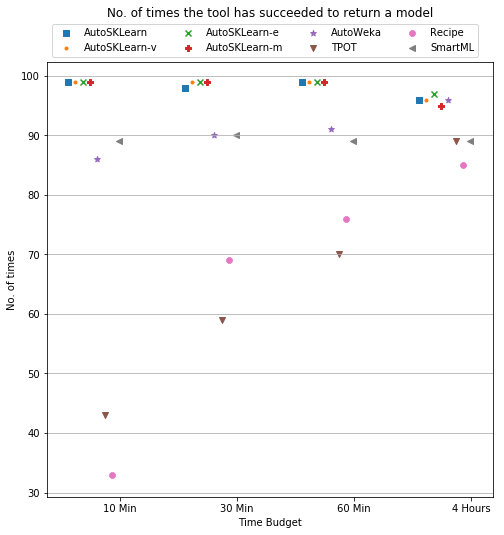

In [409]:
experiment_time = ['10 Min', '30 Min', '60 Min', '4 Hours']
frameworks = ['AutoSKLearn', 'AutoSKLearn-v', 'AutoSKLearn-e', 'AutoSKLearn-m','AutoWeka', 'TPOT', 'Recipe', 'SmartML']
#colors        = ['seagreen', 'red', 'orchid', 'orange']
gray_colors = itertools.cycle(['silver', 'gainsboro', 'gray', 'lightgrey', 'darkgray'])
autoSKLearn = [np.sum(result['10 Min'].sklearn_accuracy_mean> 0),
            np.sum(result['30 Min'].sklearn_accuracy_mean> 0),
            np.sum(result['60 Min'].sklearn_accuracy_mean> 0),
            np.sum(result['4 Hours'].sklearn_accuracy_mean> 0)]
autoSKLearn_v = [np.sum(result['10 Min'].sklearn_v_accuracy_mean> 0),
            np.sum(result['30 Min'].sklearn_v_accuracy_mean> 0),
            np.sum(result['60 Min'].sklearn_v_accuracy_mean> 0),
            np.sum(result['4 Hours'].sklearn_v_accuracy_mean> 0)]
autoSKLearn_e = [np.sum(result['10 Min'].sklearn_e_accuracy_mean> 0),
            np.sum(result['30 Min'].sklearn_e_accuracy_mean> 0),
            np.sum(result['60 Min'].sklearn_e_accuracy_mean> 0),
            np.sum(result['4 Hours'].sklearn_e_accuracy_mean> 0)]
autoSKLearn_m = [np.sum(result['10 Min'].sklearn_m_accuracy_mean> 0),
            np.sum(result['30 Min'].sklearn_m_accuracy_mean> 0),
            np.sum(result['60 Min'].sklearn_m_accuracy_mean> 0),
            np.sum(result['4 Hours'].sklearn_m_accuracy_mean> 0)]
autoweka = [np.sum(result['10 Min'].autoweka_accuracy_mean> 0),
            np.sum(result['30 Min'].autoweka_accuracy_mean> 0),
            np.sum(result['60 Min'].autoweka_accuracy_mean> 0),
            np.sum(result['4 Hours'].autoweka_accuracy_mean> 0)]
TPOT = [np.sum(result['10 Min'].tpot_accuracy_mean> 0),
            np.sum(result['30 Min'].tpot_accuracy_mean> 0),
            np.sum(result['60 Min'].tpot_accuracy_mean> 0),
            np.sum(result['4 Hours'].tpot_accuracy_mean> 0)]
Recipe = [np.sum(result['10 Min'].recipe_test_acc> 0),
            np.sum(result['30 Min'].recipe_test_acc> 0),
            np.sum(result['60 Min'].recipe_test_acc> 0),
            np.sum(result['4 Hours'].recipe_test_acc> 0)]
SmartML = [np.sum(result['10 Min'].smartml_valid_acc> 0),
            np.sum(result['30 Min'].smartml_valid_acc> 0),
            np.sum(result['60 Min'].smartml_valid_acc> 0),
            np.sum(result['4 Hours'].smartml_valid_acc> 0)]
numerical = [autoSKLearn,
             autoSKLearn_v,
             autoSKLearn_e,
             autoSKLearn_m,
             autoweka,
             TPOT,
             Recipe,
             SmartML]
#rint(np.sum(result['10 Min'].autoweka_accuracy_mean > 0))
#rint((result['10 Min'].autoweka_accuracy_mean > 0).to_string())
number_groups = len(frameworks) 
markers = itertools.cycle(['s','.', 'x', 'P', '*', 'v', '8', '<', 'o'])
bin_width = 1.0/(len(frameworks)+8)
fig, ax = plt.subplots(figsize=(8,8))
for i in range(number_groups):
    ax.scatter(x=np.arange(len(experiment_time)) + i*bin_width, 
           y=numerical[i],
           #color= next(gray_colors),
           marker =next(markers))
ax.set_xticks(np.arange(len(experiment_time)) + number_groups/(2*(number_groups+1)))
# number_groups/(2*(number_groups+1)): offset of xticklabel
ax.set_xticklabels(experiment_time)
l = ax.legend(frameworks[0:len(frameworks)], ncol=len(frameworks)//2, bbox_to_anchor=(0, 1), loc='lower left')
ax.set(xlabel='Time Budget', ylabel='No. of times')
ax.yaxis.grid() # horizontal lines
plt.title(label = 'No. of times the tool has succeeded to return a model', pad = 45)
plt.show()

# How many times each tool has achieved the best performance?

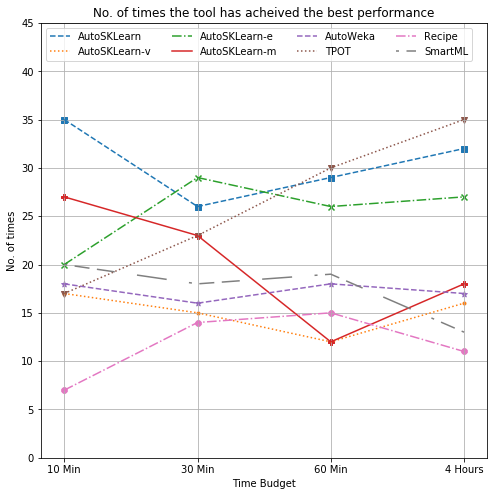

In [410]:
types=[ "sklearn_accuracy_mean", "sklearn_v_accuracy_mean", "sklearn_e_accuracy_mean", "sklearn_m_accuracy_mean",
       "autoweka_accuracy_mean", "tpot_accuracy_mean", "recipe_test_acc", "smartml_valid_acc"]
labels = ['AutoSKLearn', 'AutoSKLearn-v', 'AutoSKLearn-e', 'AutoSKLearn-m','AutoWeka', 'TPOT', 'Recipe', 'SmartML']
T=[]
for t in experiment_time:
    total = [0,0,0,0,0,0,0,0]
    for i in range(100):
        #my_list = [result['30 Min'].smartml_valid_acc[i],result['30 Min'].sklearn_accuracy_mean[i]]
        my_list= [result[t][x][i] for x in types]
        #print(my_list)
        my_list = [0 if np.isnan(x) else x for x in my_list]
        max_value = max(my_list)
        #print(max_value,my_list)
        indices = [i for i, x in enumerate(my_list) if max_value-x<0.00001]
        for ind in indices:
            total[ind]+=1
    T.append(list(total))
#print(T)

t = experiment_time
s=[]
for u in range(len(types)):
    s.append(list([T[i][u]for i in range(len(experiment_time))]))
#print(s)
fig, ax = plt.subplots(figsize=(8,8))
#ax.plot(t, s[0],linestyle='-',label=labels[0])
style = ['--', ':', '-.', '-', '--', ':', '-.', '-']
markers = itertools.cycle(['s','.', 'x', 'P', '*', 'v', '8', '<', 'o'])
for i in range(len(types)-1):
    ax.plot(t, s[i],linestyle=style[i],label=labels[i])
    ax.scatter(x=np.arange(len(experiment_time)), 
           y=s[i],
           #color= next(gray_colors),
           marker =next(markers))

line1, = ax.plot(t, s[7],linestyle='-',label=labels[7])
line1.set_dashes([2, 5, 10, 5, 12, 15, 20, 15])
ax.set(xlabel='Time Budget', ylabel='No. of times',title='No. of times the tool has acheived the best performance')
ax.grid()
#plt.xlim([-3, 3])
plt.ylim([0, 45])
plt.legend(loc='upper left', ncol=4, bbox_to_anchor=(0, 1))
plt.show()

# How many times Meta-learning improved the performance and what is the average improvement in AutoSKLearn?

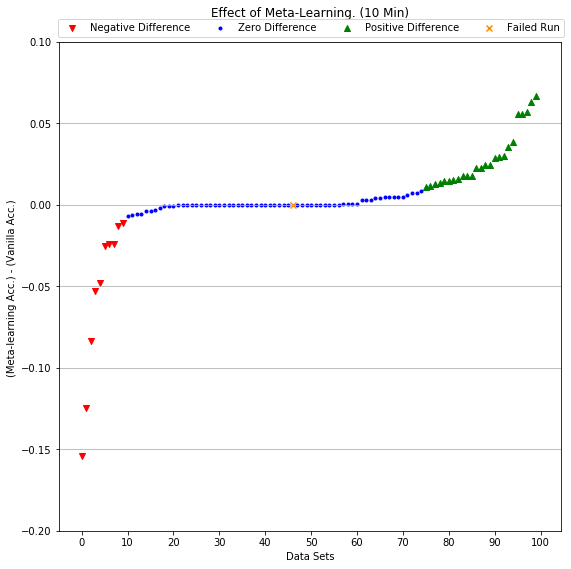

In [200]:
fig = Figure()
meta = fig.get_sheet()['10 Min'].sklearn_m_accuracy_mean
vanilla = fig.get_sheet()['10 Min'].sklearn_v_accuracy_mean
y_lable = '(Meta-learning Acc.) - (Vanilla Acc.) '
title = 'Effect of Meta-Learning. (10 Min)'
fig.comare_acc_scatter(meta, vanilla, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, y_limit=[-0.2, 0.1])

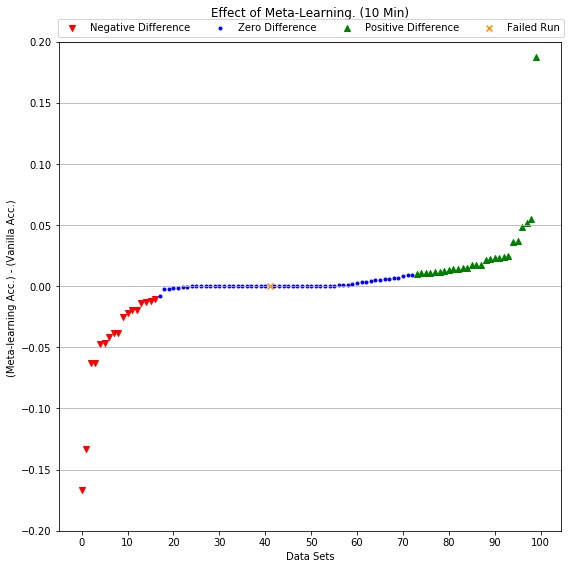

In [201]:
fig = Figure()
meta = fig.get_sheet()['30 Min'].sklearn_m_accuracy_mean
vanilla = fig.get_sheet()['30 Min'].sklearn_v_accuracy_mean
y_lable = '(Meta-learning Acc.) - (Vanilla Acc.) '
title = 'Effect of Meta-Learning. (10 Min)'
fig.comare_acc_scatter(meta, vanilla, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, y_limit=[-0.2, 0.2])

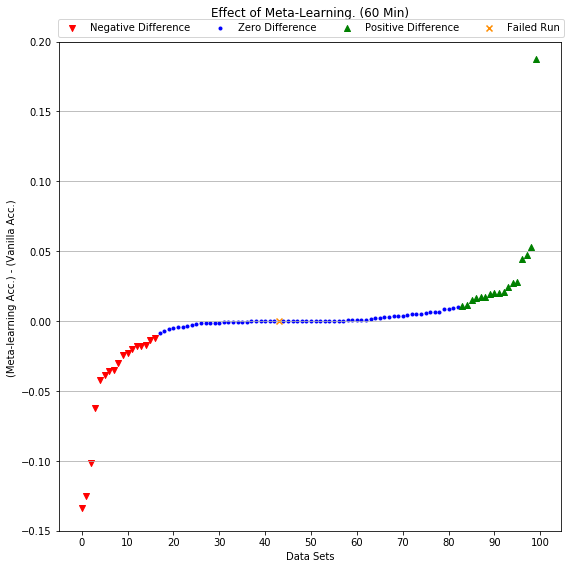

In [202]:
fig = Figure()
meta = fig.get_sheet()['60 Min'].sklearn_m_accuracy_mean
vanilla = fig.get_sheet()['60 Min'].sklearn_v_accuracy_mean
y_lable = '(Meta-learning Acc.) - (Vanilla Acc.) '
title = 'Effect of Meta-Learning. (60 Min)'
fig.comare_acc_scatter(tpot, recipe, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, y_limit=[-0.15, 0.2])

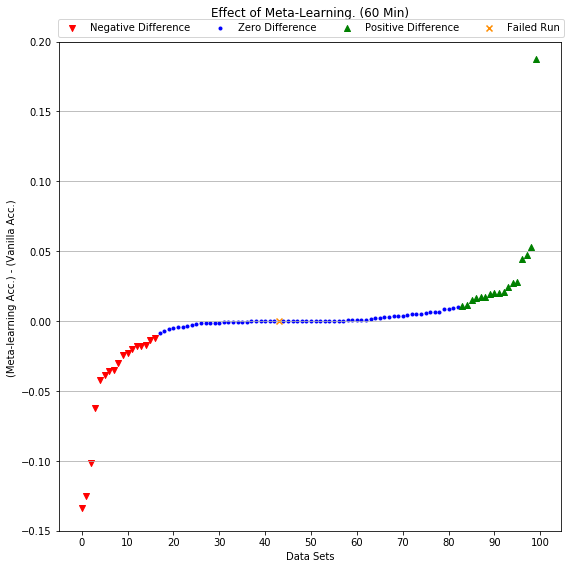

In [203]:
fig = Figure()
meta = fig.get_sheet()['60 Min'].sklearn_m_accuracy_mean
vanilla = fig.get_sheet()['60 Min'].sklearn_v_accuracy_mean
y_lable = '(Meta-learning Acc.) - (Vanilla Acc.) '
title = 'Effect of Meta-Learning. (60 Min)'
fig.comare_acc_scatter(meta, vanilla, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, y_limit=[-0.15, 0.2])

# How many times Ensembling improved the performance and what is the average improvement in AutoSKLearn?

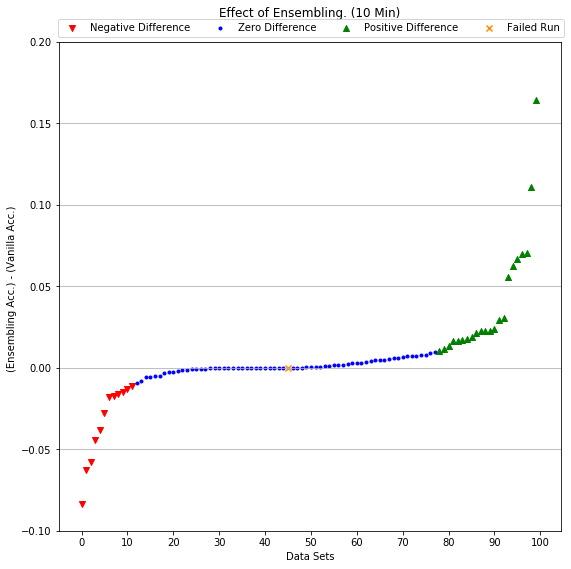

In [204]:
fig = Figure()
ensembling = fig.get_sheet()['10 Min'].sklearn_e_accuracy_mean
vanilla = fig.get_sheet()['10 Min'].sklearn_v_accuracy_mean
y_lable = '(Ensembling Acc.) - (Vanilla Acc.) '
title = 'Effect of Ensembling. (10 Min)'
fig.comare_acc_scatter(ensembling, vanilla, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, y_limit=[-0.1, 0.2])

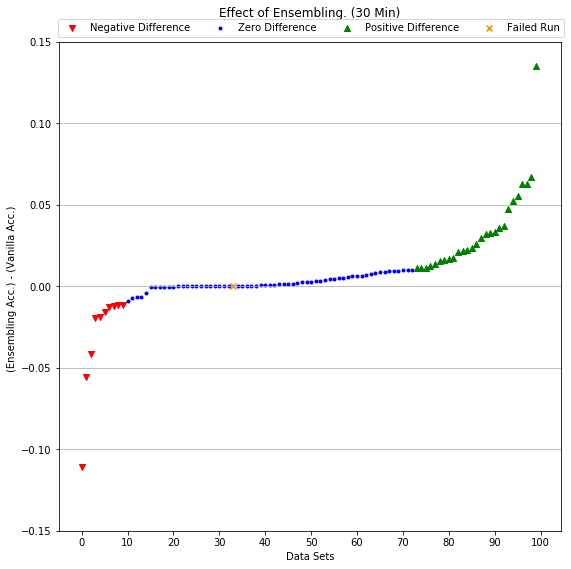

In [205]:
fig = Figure()
ensembling = fig.get_sheet()['30 Min'].sklearn_e_accuracy_mean
vanilla = fig.get_sheet()['30 Min'].sklearn_v_accuracy_mean
y_lable = '(Ensembling Acc.) - (Vanilla Acc.) '
title = 'Effect of Ensembling. (30 Min)'
fig.comare_acc_scatter(ensembling, vanilla, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, y_limit=[-0.15, 0.15])

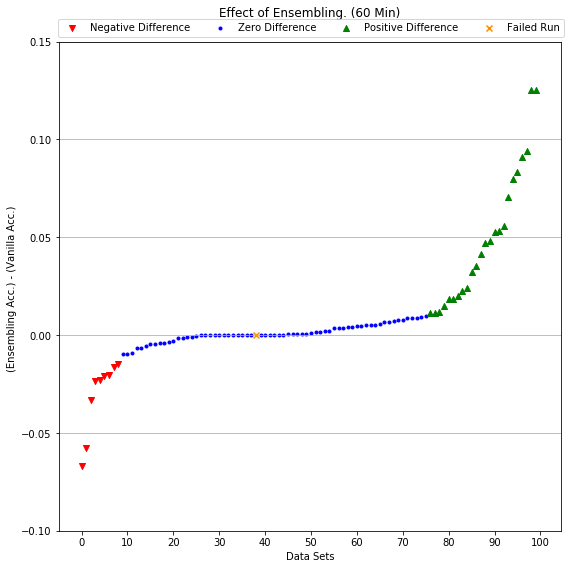

In [208]:
fig = Figure()
ensembling = fig.get_sheet()['60 Min'].sklearn_e_accuracy_mean
vanilla = fig.get_sheet()['60 Min'].sklearn_v_accuracy_mean
y_lable = '(Ensembling Acc.) - (Vanilla Acc.) '
title = 'Effect of Ensembling. (60 Min)'
fig.comare_acc_scatter(ensembling, vanilla, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, y_limit=[-0.1, 0.15])

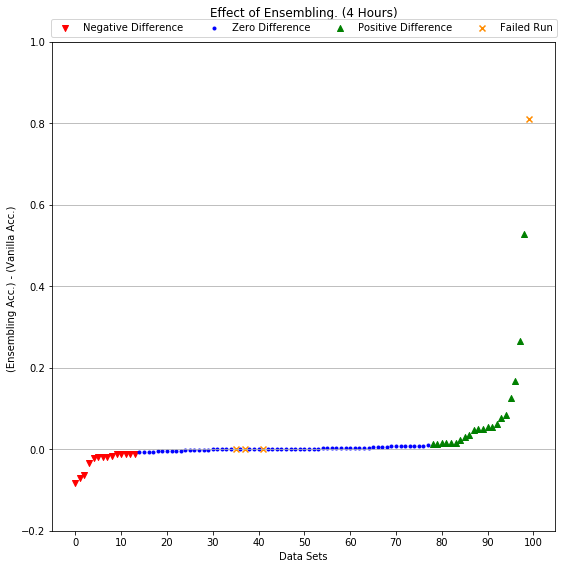

In [210]:
fig = Figure()
ensembling = fig.get_sheet()['4 Hours'].sklearn_e_accuracy_mean
vanilla = fig.get_sheet()['4 Hours'].sklearn_v_accuracy_mean
y_lable = '(Ensembling Acc.) - (Vanilla Acc.) '
title = 'Effect of Ensembling. (4 Hours)'
fig.comare_acc_scatter(ensembling, vanilla, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, y_limit=[-0.2, 1])

# How many times combined Meta-learning and Ensembling improved the performance and what is the average improvement in AutoSKLearn?

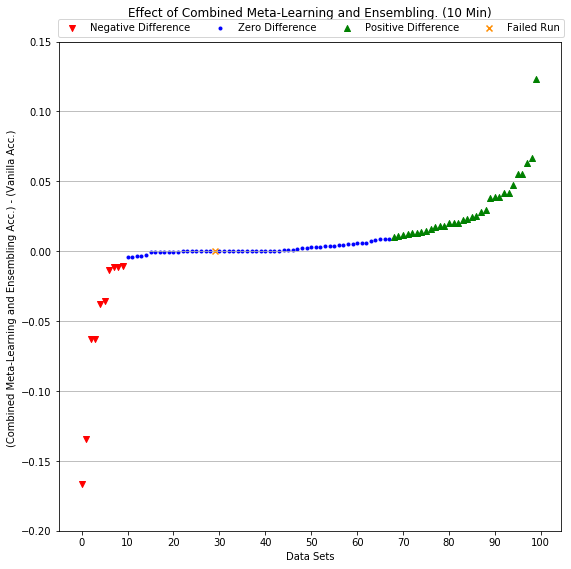

In [215]:
fig = Figure()
full = fig.get_sheet()['10 Min'].sklearn_accuracy_mean
vanilla = fig.get_sheet()['10 Min'].sklearn_v_accuracy_mean
y_lable = '(Combined Meta-Learning and Ensembling Acc.) - (Vanilla Acc.) '
title = 'Effect of Combined Meta-Learning and Ensembling. (10 Min)'
fig.comare_acc_scatter(full, vanilla, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, y_limit=[-0.2, 0.15])

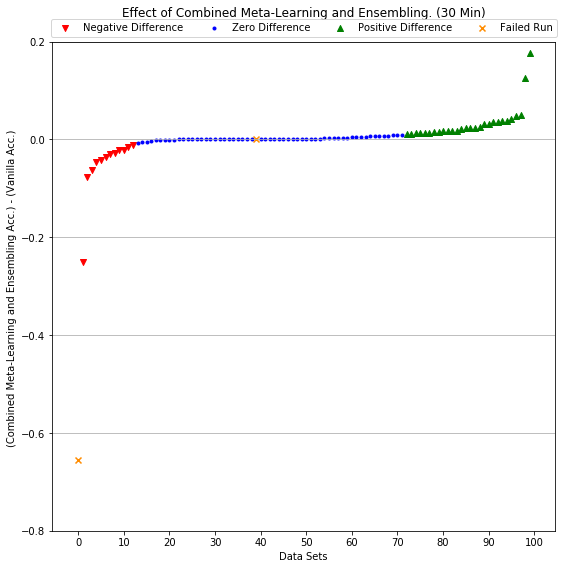

In [217]:
fig = Figure()
full = fig.get_sheet()['30 Min'].sklearn_accuracy_mean
vanilla = fig.get_sheet()['30 Min'].sklearn_v_accuracy_mean
y_lable = '(Combined Meta-Learning and Ensembling Acc.) - (Vanilla Acc.) '
title = 'Effect of Combined Meta-Learning and Ensembling. (30 Min)'
fig.comare_acc_scatter(full, vanilla, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, y_limit=[-0.8, 0.2])

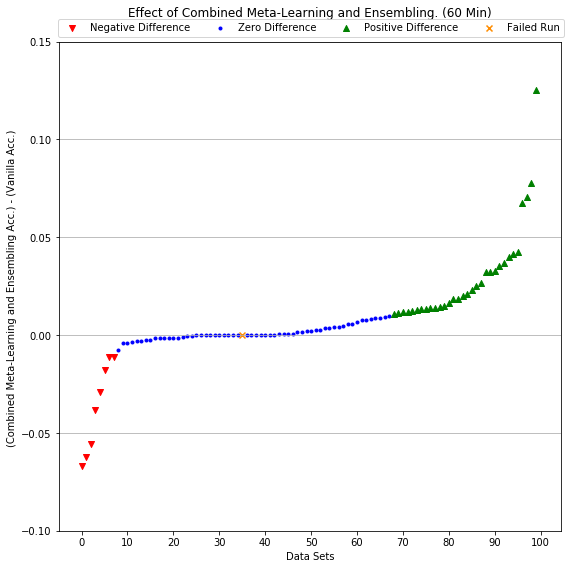

In [221]:
fig = Figure()
full = fig.get_sheet()['60 Min'].sklearn_accuracy_mean
vanilla = fig.get_sheet()['60 Min'].sklearn_v_accuracy_mean
y_lable = '(Combined Meta-Learning and Ensembling Acc.) - (Vanilla Acc.) '
title = 'Effect of Combined Meta-Learning and Ensembling. (60 Min)'
fig.comare_acc_scatter(full, vanilla, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, y_limit=[-0.1, 0.15])

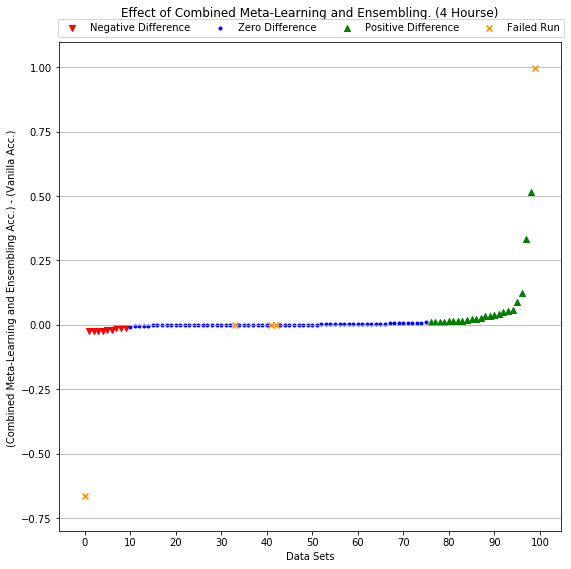

In [224]:
fig = Figure()
full = fig.get_sheet()['4 Hours'].sklearn_accuracy_mean
vanilla = fig.get_sheet()['4 Hours'].sklearn_v_accuracy_mean
y_lable = '(Combined Meta-Learning and Ensembling Acc.) - (Vanilla Acc.) '
title = 'Effect of Combined Meta-Learning and Ensembling. (4 Hourse)'
fig.comare_acc_scatter(full, vanilla, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, y_limit=[-0.8, 1.1])

# TPOT v.s. Recipe 

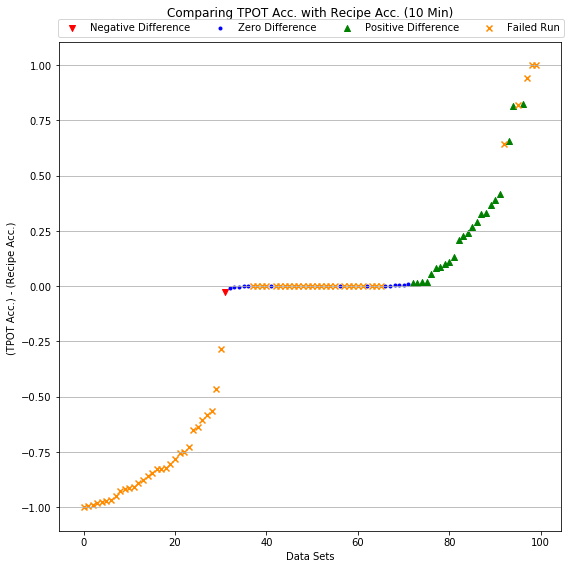

In [162]:
fig = Figure()
tpot = fig.get_sheet()['10 Min'].tpot_accuracy_mean
recipe = fig.get_sheet()['30 Min'].recipe_test_acc
x_label = 'Data Sets'
y_lable = '(TPOT Acc.) - (Recipe Acc.) '
title = 'Comparing TPOT Acc. with Recipe Acc. (10 Min)'
fig.comare_acc_scatter(tpot, recipe, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012)

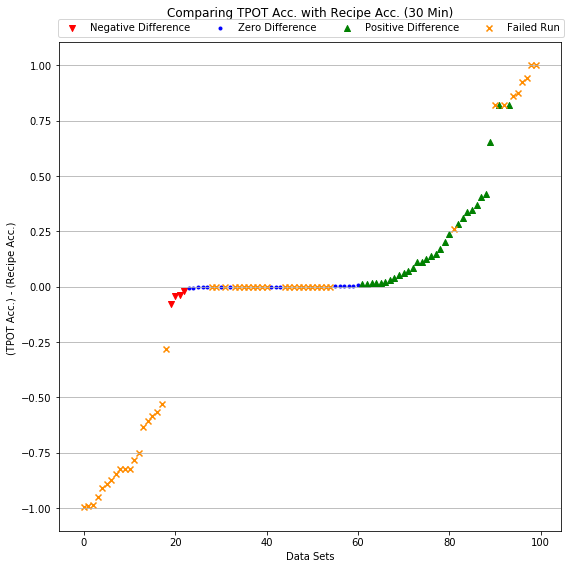

In [155]:
fig = Figure()
tpot = fig.get_sheet()['30 Min'].tpot_accuracy_mean
recipe = fig.get_sheet()['30 Min'].recipe_test_acc
x_label = 'Data Sets'
y_lable = '(TPOT Acc.) - (Recipe Acc.) '
title = 'Comparing TPOT Acc. with Recipe Acc. (30 Min)'
fig.comare_acc_scatter(tpot, recipe, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012)

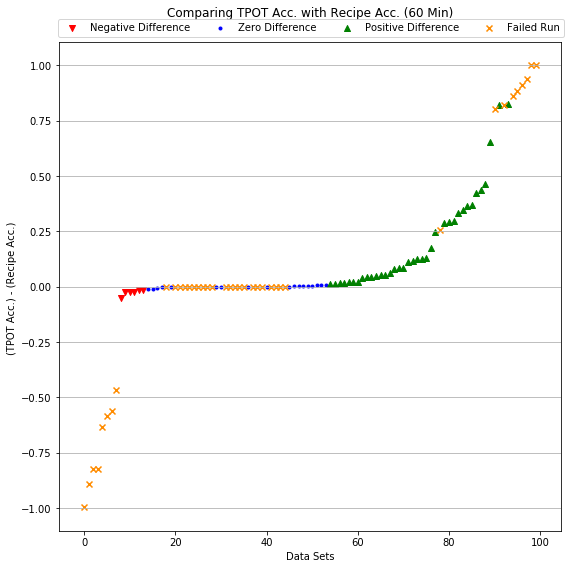

In [157]:
fig = Figure()
tpot = fig.get_sheet()['60 Min'].tpot_accuracy_mean
recipe = fig.get_sheet()['30 Min'].recipe_test_acc
x_label = 'Data Sets'
y_lable = '(TPOT Acc.) - (Recipe Acc.) '
title = 'Comparing TPOT Acc. with Recipe Acc. (60 Min)'
fig.comare_acc_scatter(tpot, recipe, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012)

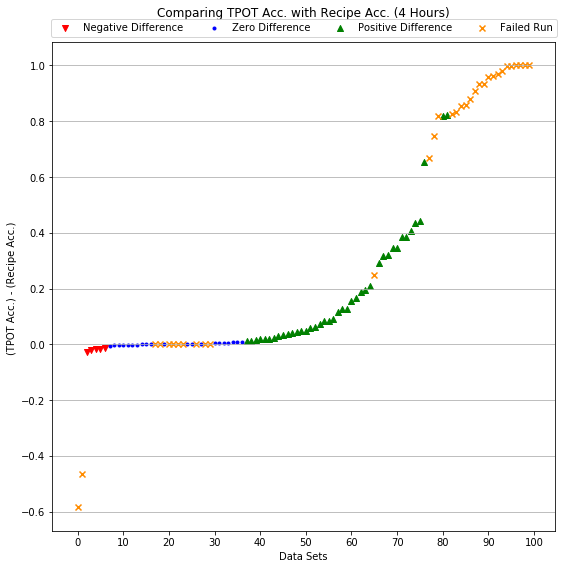

In [225]:
fig = Figure()
tpot = fig.get_sheet()['4 Hours'].tpot_accuracy_mean
recipe = fig.get_sheet()['30 Min'].recipe_test_acc
x_label = 'Data Sets'
y_lable = '(TPOT Acc.) - (Recipe Acc.) '
title = 'Comparing TPOT Acc. with Recipe Acc. (4 Hours)'
fig.comare_acc_scatter(tpot, recipe, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012)

## TPOT  and Recipe Comparison

In [226]:
x_label

'Data Sets'